# **Linking bee abundance and diversity with habitat quality**

## Is there a link between bee abundance, bee species diversity and the quality of habitat, defined as:

### - Floral resources
### - Flower species diversity
### - Shelter
### - Percentage of semi-natural habitat


## The Dataset
Dataset URL: https://catalogue.ceh.ac.uk/documents/d774f98f-030d-45bb-8042-7729573a13b2

This data was collected from 48 farms with different patches of habitat designed to provide resources for wildlife between 2007 and 2008. The aim of this was to address whether EU agri-environmental schemes that promote patches of habitat which are nectar and seed rich on farms are impacting the diversity of birds, bees and butterflies, and to better understand farmer attitudes to the schemes and the impact this has on wildlife, and the quality of patches (amount of floral and seed resources). 

In its raw state, the data contains geographic information relating to sample site (farm, region, patch, soil), survey data (year, temperature, wind), ecological data (bee species, bee abundance, flowers, flower species, amount of semi-natural habitat), and qualitative data relating to the farmer (experience and motiviation for environmental management, concerns about how this impacts their lives and meeting the targets set by the schemes). Whilst the qualitative data is interesting, the sample size is somewhat limited relative to the ecologicial data, and these could represent confounding variables. As such I decided to focus on the ecological data relating to floral resources, bee abundance and diversity, shelter and semi-natural habitat (sampling of floral resources and shelter is purely related to the patch, semi-natural habitat is % cover in a 4k^2 cell centered on the farm, therefore there is not confounding influence).

## The Plan

First, my dependent variables are bee abundance and bee species diversity. My independent variables are number of flowers, number of flower species, shelter and % of semi-natural habitat. 

Step one, I will need to clean my data. Check it for outliers using boxplots and remove as nessecary, and then check for normality and transform if necessary. 

Next, I will visualise the data to see if there are any correlations that are immmediately obvious. Again this will be seperate for bee abundance and diversity. 

To explore the influence of the independent variables, I need to run two analyses- one for bee abundance and one for bee diversity. For an analysis, I will run two multiple linear models comparing independent variables against each of the dependent variables. 

I will report the p-value, F and R^2 statistics for the test, and, if there are any correlations I will display graphs with the regression line for each correlation.


## First, I need to set up my workspace.
I will import packages here, if I need any packages later in the workbook I will add them here to keep track of them. 
I am importing my data, and looking at the overview to check it's read correctly

In [1]:
#Setting up

##required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

dat=pd.read_csv("beedata.csv")

##Get overview
display(dat)
dat.info()




,Farm,Patch_No,Year,Bees,BeeSp,Flowers,FlowerSp,Shelter,PCSemi_Nat
0,E4.11,P1,2007,20,3,1408,6,6.0,14.8
1,E4.11,P2,2007,20,2,422,6,6.0,14.8
2,E4.11,P3,2007,0,0,2,1,3.0,14.8
3,E4.11,P1,2008,5,2,30,3,6.0,14.8
4,E4.11,P2,2008,0,0,1,0,6.0,14.8
...,...,...,...,...,...,...,...,...,...
117,W4.5,P3,2008,0,0,60,3,0.0,7.5
118,W4.8,P1,2007,2,1,93,3,2.0,9.3
119,W4.8,P2,2007,0,0,89,3,2.5,9.3
120,W4.8,P1,2008,0,0,11,4,2.0,9.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Farm        122 non-null    object 
 1   Patch_No    122 non-null    object 
 2   Year        122 non-null    int64  
 3   Bees        122 non-null    int64  
 4   BeeSp       122 non-null    int64  
 5   Flowers     122 non-null    int64  
 6   FlowerSp    122 non-null    int64  
 7   Shelter     122 non-null    float64
 8   PCSemi_Nat  122 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 8.7+ KB


## Cleaning the data
Next I need to clean the data, first I will check for na values.
Then I will use boxplots to check for any outliers, so first I need to subset these into their own variables. I will plot these all on the same access for easier visualisation, but flowers will need to be plotted on its own axes as it is at a much larger scale than the others. 
I can see I have outliers, so I will apply the function to remove these from each of the variables from the main data.
I display the info and data to check that outliers have been removed and it looks okay

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 121
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Farm        109 non-null    object 
 1   Patch_No    109 non-null    object 
 2   Year        109 non-null    int64  
 3   Bees        109 non-null    int64  
 4   BeeSp       109 non-null    int64  
 5   Flowers     109 non-null    int64  
 6   FlowerSp    109 non-null    int64  
 7   Shelter     109 non-null    float64
 8   PCSemi_Nat  109 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 8.5+ KB


,Farm,Patch_No,Year,Bees,BeeSp,Flowers,FlowerSp,Shelter,PCSemi_Nat
0,E4.11,P1,2007,20,3,1408,6,6.0,14.8
1,E4.11,P2,2007,20,2,422,6,6.0,14.8
2,E4.11,P3,2007,0,0,2,1,3.0,14.8
3,E4.11,P1,2008,5,2,30,3,6.0,14.8
4,E4.11,P2,2008,0,0,1,0,6.0,14.8
...,...,...,...,...,...,...,...,...,...
117,W4.5,P3,2008,0,0,60,3,0.0,7.5
118,W4.8,P1,2007,2,1,93,3,2.0,9.3
119,W4.8,P2,2007,0,0,89,3,2.5,9.3
120,W4.8,P1,2008,0,0,11,4,2.0,9.3


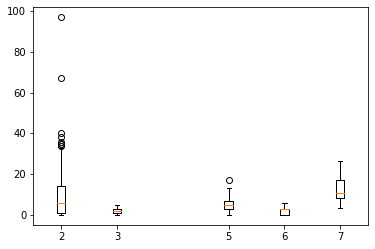

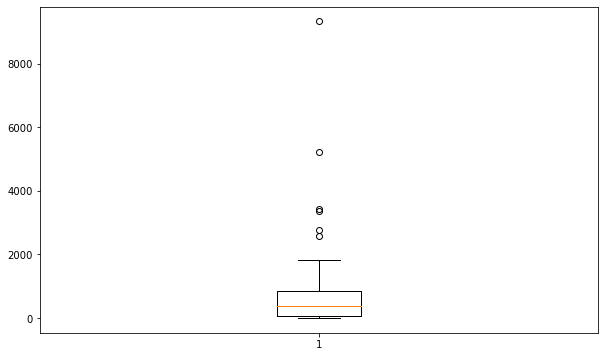

In [2]:
# Cleaning

##Check for NA and remove if any
print(dat.isnull().values.any())

###None

##Check for outliers
Bees= dat['Bees']
Bees_box=plt.boxplot(Bees, positions=[2])

Bee_sp= dat['BeeSp']
Bee_sp_box=plt.boxplot(Bee_sp, positions=[3])

Flower_sp= dat['FlowerSp']
Flowers_sp_box=plt.boxplot(Flower_sp, positions=[5])

Shelter= dat['Shelter']
Shelter_box=plt.boxplot(Shelter, positions=[6])

Semi_nat= dat['PCSemi_Nat']
Semi_nat_box=plt.boxplot(Semi_nat, positions=[7])

plt.figure(figsize=(10, 6))

###Plot alone as scale is v. different

Flowers= dat['Flowers']
Flowers_box=plt.boxplot(Flowers)

###Outliers in Bees, Flower sp, and Flower, removing these: 
def remove_outliers(df, column):
    q1= column.quantile(0.25)
    q3= column.quantile(0.75)
    IQR = q3 - q1
    upper_limit = (q3 + 1.5*IQR)
    lower_limit = (q1 - 1.5*IQR)
    df_normal = df[(column <= upper_limit) & (column >= lower_limit)]
    return df_normal

dat1=remove_outliers(dat, dat['Bees'])
dat2=remove_outliers(dat1, dat1['FlowerSp'])
dat3=remove_outliers(dat2, dat2['Flowers'])

dat3.info()
display(dat3)


## Normality 
First, I'd like to visualise this. On visualising it I can see that there is some skew. Bee abundance looks really skewed so I will get the skew and kurtosis to work out how skewed it is. 
The table shows it is highly positively skewed. Normally I would use log transformation to offset this, but the data has 0's so I will apply a transformation which can handle this and add this to the data. 
The transformed bee abundance isn't perfect, but it's better than it was so I feel okay to use it and I will check normality in the regression plots. 

ValueError: cannot insert Bees_log, already exists

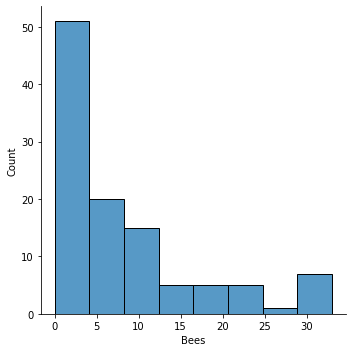

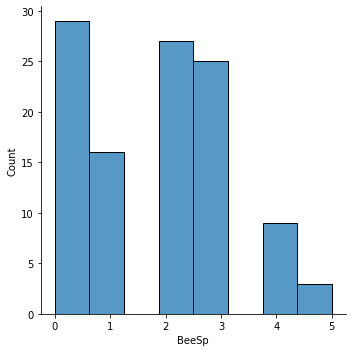

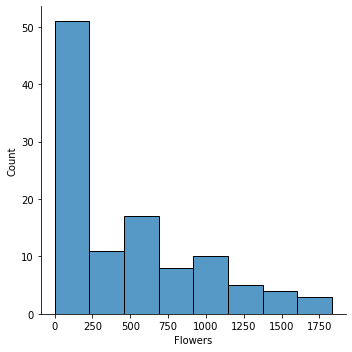

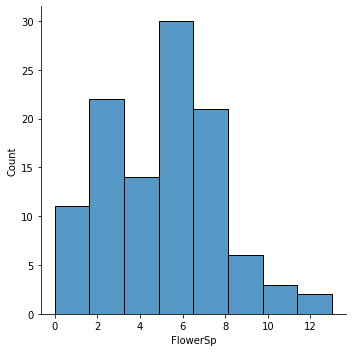

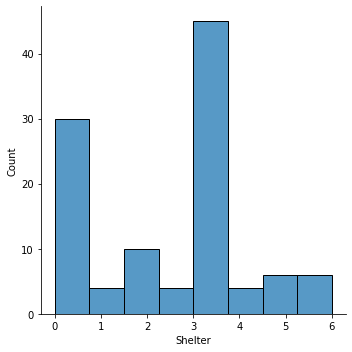

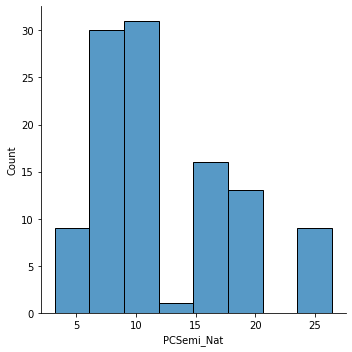

In [4]:
#Visualisations for normality etc

##Check for normality
import seaborn as sns
sns.displot(data=dat3, x="Bees")
sns.displot(data=dat3, x="BeeSp")
sns.displot(data=dat3, x="Flowers")
sns.displot(data=dat3, x="FlowerSp")
sns.displot(data=dat3, x="Shelter")
sns.displot(data=dat3, x='PCSemi_Nat')

###Some skew, get values
dat3.agg(['skew', 'kurtosis']).transpose()

###Bees needs log transform, use arcsinh as 0 values
dat3.insert(len(dat3.columns), 'Bees_log', np.arcsinh(dat3['Bees']))
sns.displot(data=dat3, x="Bees_log")



## Visualisations
Before doing anything else, I will visualise the data compared with abundance and diversity. 
The data looks a bit odd as some variables are discrete, and there are not that many bee species. Makes it difficult to predict any strong trends. 
I will export the clean and transformed data so it can be imported into an R workspace ready for analysis. 

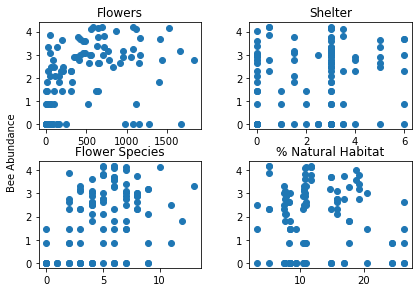

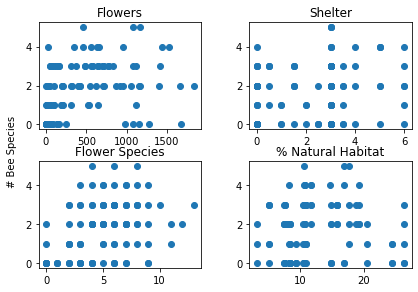

In [5]:
#Visualisations cont. 
##Bee abundance
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
axs[0,0].scatter(dat3['Flowers'], dat3['Bees_log'])
axs[1,0].scatter(dat3['FlowerSp'], dat3['Bees_log'])
axs[0,1].scatter(dat3['Shelter'], dat3['Bees_log'])
axs[1,1].scatter(dat3['PCSemi_Nat'], dat3['Bees_log'])
axs[0,0].title.set_text('Flowers')
axs[1,0].title.set_text('Flower Species')
axs[0,1].title.set_text('Shelter')
axs[1,1].title.set_text('% Natural Habitat')
fig.text(0.02, 0.5, 'Bee Abundance', va='center', rotation='vertical')
plt.show()

##Bee Diversity
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
axs[0,0].scatter(dat3['Flowers'], dat3['BeeSp'])
axs[1,0].scatter(dat3['FlowerSp'], dat3['BeeSp'])
axs[0,1].scatter(dat3['Shelter'], dat3['BeeSp'])
axs[1,1].scatter(dat3['PCSemi_Nat'], dat3['BeeSp'])
axs[0,0].title.set_text('Flowers')
axs[1,0].title.set_text('Flower Species')
axs[0,1].title.set_text('Shelter')
axs[1,1].title.set_text('% Natural Habitat')
fig.text(0.02, 0.5, '# Bee Species', va='center', rotation='vertical')
plt.show()


###Potentially problematic that any species count is discrete. Export dat3 as csv for R
dat3.to_csv(r'bees_clean.csv', index = False)